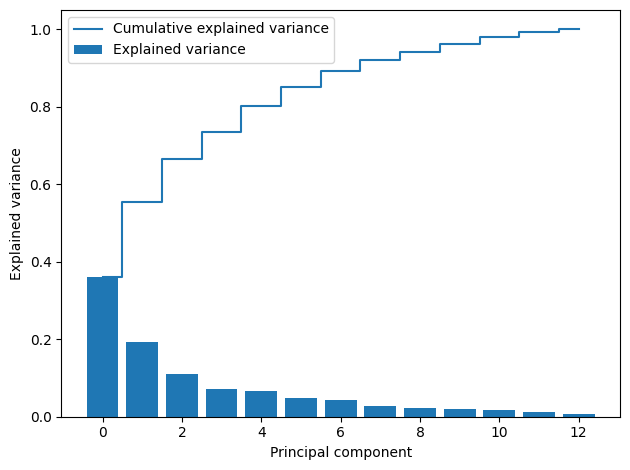

(1797, 64)


<Figure size 640x480 with 0 Axes>

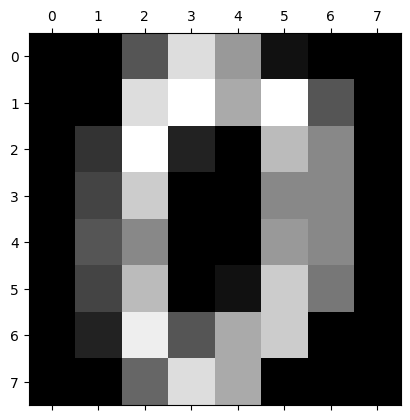

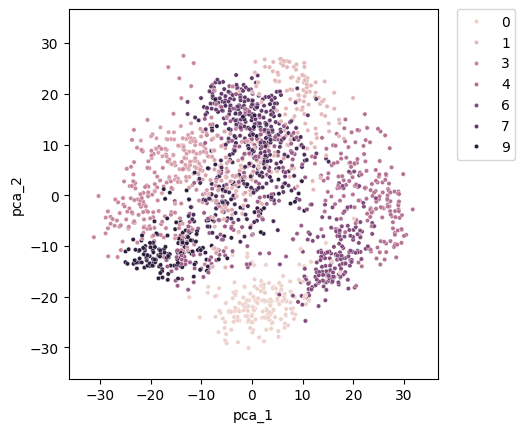

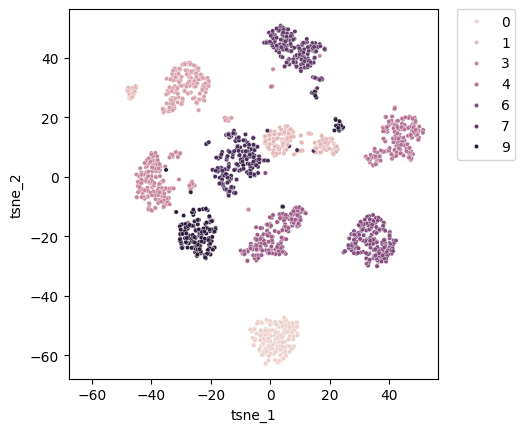

In [3]:
# Dimensionality Reduction з PCA та t-SNE

import pandas as pd  # Для роботи з DataFrame
import numpy as np  # Для роботи з масивами
import matplotlib.pyplot as plt  # Для візуалізації
import seaborn as sns  # Для красивих графіків
from sklearn.datasets import load_wine, load_digits  # Завантаження вбудованих датасетів
from sklearn.preprocessing import StandardScaler  # Для стандартизації ознак
from sklearn.decomposition import PCA  # Для PCA
from sklearn.manifold import TSNE  # Для t-SNE

# ----------------------------
# Робота з датасетом Wine
# ----------------------------
wine_data = load_wine()  # Завантаження датасету Wine

# Перегляд ключів датасету
wine_data.keys()

# Перегляд назв ознак
wine_data['feature_names']

# Виділення ознак
X = wine_data['data']

# ----------------------------
# PCA (Principal Component Analysis)
# ----------------------------
scaler = StandardScaler()  # Ініціалізація стандартизатора
X_std = scaler.fit_transform(X)  # Масштабування ознак (середнє=0, дисперсія=1)

pca = PCA()  # Ініціалізація PCA без обмеження кількості компонент
X_pca = pca.fit_transform(X_std)  # Навчання PCA та трансформація даних

# Пояснена дисперсія
exp_var_pca = pca.explained_variance_ratio_  # Частка дисперсії для кожної компоненти
cum_sum_eigenvalues = np.cumsum(exp_var_pca)  # Кумулятивна сума поясненої дисперсії

# Візуалізація поясненої дисперсії
plt.bar(range(len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# ----------------------------
# Робота з датасетом Digits
# ----------------------------
digits = load_digits()  # Завантаження датасету рукописних цифр

X = digits.data  # Ознаки (пікселі)
y = digits.target  # Мітки класів
print(digits.data.shape)  # Перегляд розмірності даних

# Візуалізація першої цифри
plt.gray()  # Встановлення чорно-білої палітри
plt.matshow(digits.images[0])  # Показ зображення першої цифри
plt.show()

# ----------------------------
# PCA для зображень Digits
# ----------------------------
pca = PCA(n_components=2)  # Зменшення до 2 компонент для візуалізації
pca_result = pca.fit_transform(X)  # Трансформація даних

# Перетворення в DataFrame для зручної роботи з seaborn
pca_result_df = pd.DataFrame({
    'pca_1': pca_result[:,0],
    'pca_2': pca_result[:,1],
    'label': y
})

# Візуалізація результатів PCA
fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax, s=10)
lim = (pca_result.min()-5, pca_result.max()+5)  # Межі графіку
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')  # Однаковий масштаб по осях
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)  # Розташування легенди
plt.show()

# ----------------------------
# t-SNE для зображень Digits
# ----------------------------
tsne = TSNE(n_components=2, random_state=0)  # Ініціалізація t-SNE
tsne_result = tsne.fit_transform(X)  # Трансформація даних

# Перетворення в DataFrame для seaborn
tsne_result_df = pd.DataFrame({
    'tsne_1': tsne_result[:,0],
    'tsne_2': tsne_result[:,1],
    'label': y
})

# Візуалізація результатів t-SNE
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()
